In [2]:
import numpy as np 
import pandas as pd

df1 =pd.read_csv("../data/VideoStarted.csv")
df2 = pd.read_csv("../data/VideoDetails.csv")
# print("VideoStarted Dataset")
df1.head(5)

VideoStarted Dataset


,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,0280dfdd112732a3ac12b12dc770b7af,20170106,0,8,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94
1,435d41ae019cb8db785483793859c9a8,20170106,0,28,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c
2,1faf0ce0b98e02e1568702f516f01a78,20170106,0,36,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53
3,3ec691b9d2b5d53ef965fe59b1900b30,20170106,0,48,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546
4,ff230d487a7139b65f33b54a4cbd2d9e,20170106,0,56,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39


# Videodetails dataset

In [5]:
df2.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,dc93d200565e5bf6e6fc55adb1c5ba06,20170106,0,4,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983
1,12060efd8b68ea562b265d0129a8af1f,20170106,0,16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f
2,9151ab2a901458f27e36548d4a8dc011,20170106,0,20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c
3,1faf0ce0b98e02e1568702f516f01a78,20170106,0,20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3
4,435d41ae019cb8db785483793859c9a8,20170106,0,20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e


In [6]:
df2['Date'] = df2['Date'].apply(lambda x:str(x)[0:4]+str('/') + str(x)[4:6] + str('/') + str(x)[6:8])
df2.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,0,4,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,0,16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,0,20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3
4,435d41ae019cb8db785483793859c9a8,2017/01/06,0,20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e


In [7]:
df2['Start_Time_hr'] = df2['Minute_Of_Day']//60
df2['Start_Time_min'] = df2['Minute_Of_Day']%60
df2['Start_Time_sec'] = df2['Second']
df2 = df2.drop(columns = 'Minute_Of_Day')
df2 = df2.drop(columns = 'Second')
df2.head(5)

,UserId,Date,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Start_Time_hr,Start_Time_min,Start_Time_sec
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,0,0,4
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,0,0,16
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,0,0,20
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,0,0,20
4,435d41ae019cb8db785483793859c9a8,2017/01/06,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,0,0,20


In [8]:
df2['Start_Time_hr'] = df2['Start_Time_hr'].apply(lambda x: str(x).zfill(2))
df2['Start_Time_min'] = df2['Start_Time_min'].apply(lambda x: str(x).zfill(2) )
df2['Start_Time_sec'] =df2['Start_Time_sec'].apply(lambda x: str(x).zfill(2))
df2['time'] = df2['Start_Time_hr'] + str(':') + df2['Start_Time_min'] + str(':') + df2['Start_Time_sec']
df2.head(5)

,UserId,Date,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Start_Time_hr,Start_Time_min,Start_Time_sec,time
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,00,00,04,00:00:04
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,00,00,16,00:00:16
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,00,00,20,00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,00,00,20,00:00:20
4,435d41ae019cb8db785483793859c9a8,2017/01/06,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,00,00,20,00:00:20


In [9]:

df2.head(5)

,UserId,Date,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Start_Time_hr,Start_Time_min,Start_Time_sec,time
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,00,00,04,00:00:04
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,00,00,16,00:00:16
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,00,00,20,00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,00,00,20,00:00:20
4,435d41ae019cb8db785483793859c9a8,2017/01/06,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,00,00,20,00:00:20


In [10]:
df2['date-time'] = df2['Date'] + ' ' + df2['time']
df2['date-time'] = pd.to_datetime(df2['date-time'])
df2.drop(columns = ['Date','time'],inplace = True)

df2.head(5)

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Start_Time_hr,Start_Time_min,Start_Time_sec,date-time
0,dc93d200565e5bf6e6fc55adb1c5ba06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,00,00,04,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,00,00,16,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,00,00,20,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,00,00,20,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,00,00,20,2017-01-06 00:00:20


# Shape of Dataset

In [24]:
df2.shape

(3695451, 10)

In [26]:
##value count countrywise
df2.Country.value_counts().head(10)

1      2688671
40      928251
255      66443
14        4393
2         2797
30        2399
47         586
0          494
46         398
12         209
Name: Country, dtype: int64

In [30]:
#taking only top seven countries:
df2 = df2[df2.Country.isin([1,40,255])]
print(df2.shape)
df2.head(10)

(3683365, 10)


,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,date-time
0,dc93d200565e5bf6e6fc55adb1c5ba06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,2017-01-06 00:00:20
5,434200a07e2d14835580cee9ddcf978c,0,Thriller,vod,Movies,255,1,1,8d03b652089819c4bc6a77ef653635ff,2017-01-06 00:00:24
6,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,6b14489f3e020c5748624098a605aa1e,2017-01-06 00:00:28
7,3ec691b9d2b5d53ef965fe59b1900b30,35,Drama,vod,TV Shows,1,2,2,7f28920fe8255272f3f408c4b2564868,2017-01-06 00:00:40
8,9151ab2a901458f27e36548d4a8dc011,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,2017-01-06 00:00:44
9,cc3c6d5497235af3c445f41296a4e81f,0,Drama,vod,Movies,255,1,1,662f197c76deabd3b56a6ed109c873b4,2017-01-06 00:00:44


In [31]:
#value_count of OS
df2.OS.value_counts().head(10)

1    3115489
2     567774
0        102
Name: OS, dtype: int64

In [32]:
#taking operating system 1 & 2
df2 = df2[df2.OS.isin([1,2])]
print(df2.shape)
df2.head(10)

(3683263, 10)


,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,date-time
0,dc93d200565e5bf6e6fc55adb1c5ba06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,2017-01-06 00:00:20
5,434200a07e2d14835580cee9ddcf978c,0,Thriller,vod,Movies,255,1,1,8d03b652089819c4bc6a77ef653635ff,2017-01-06 00:00:24
6,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,6b14489f3e020c5748624098a605aa1e,2017-01-06 00:00:28
7,3ec691b9d2b5d53ef965fe59b1900b30,35,Drama,vod,TV Shows,1,2,2,7f28920fe8255272f3f408c4b2564868,2017-01-06 00:00:40
8,9151ab2a901458f27e36548d4a8dc011,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,2017-01-06 00:00:44
9,cc3c6d5497235af3c445f41296a4e81f,0,Drama,vod,Movies,255,1,1,662f197c76deabd3b56a6ed109c873b4,2017-01-06 00:00:44


In [5]:
#value_count of Device
df2.OS.value_counts()

1    3124579
2     570770
0        102
Name: OS, dtype: int64

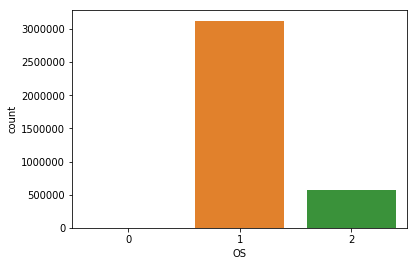

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
a = sns.countplot(df2['OS'])
a.figure.savefig("output4.png")

In [36]:
#value_count of Category
df2.Category.value_counts()

 vod        3504531
 linear      178732
Name: Category, dtype: int64

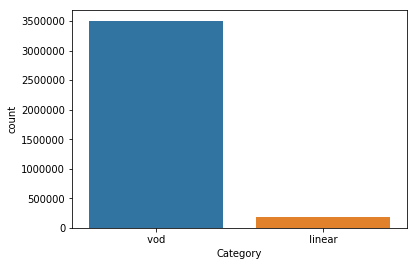

In [37]:
sns.countplot(df2['Category'])

In [42]:
#value_count of Genre
df2.Genre.value_counts().head(15)


 Drama                  2348356
 Anime                   411537
 Romance                 309681
 Comedy                  187854
 Action                  103016
 Horror                   94113
 Variety                  58073
 Animation                32591
 Motor Sports             19890
 Sports Magazine          15696
 Reality Show             13044
 TV Shows (General)       11614
 Thriller                 10866
 Family                   10605
 Crime                     7490
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text xticklabel objects>)

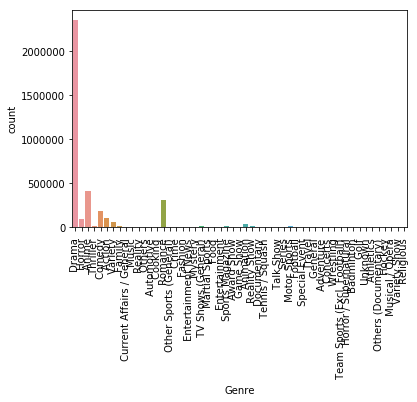

In [45]:
sns.countplot(df2.Genre)
plt.xticks(rotation = '90')

In [17]:
df2[df2['VideoId'] =='82114e85b433b5b2f9e400b5a07dc8b8']

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Start_Time_hr,Start_Time_min,Start_Time_sec,date-time
312363,0a229a2fe932f0bf49c75e5d5d185ec5,57,Drama,vod,TV Shows,1,1,1,82114e85b433b5b2f9e400b5a07dc8b8,02,57,28,2017-01-31 02:57:28
337529,d011afa550e318d8b23a2f8646035939,160,Drama,vod,TV Shows,40,1,1,82114e85b433b5b2f9e400b5a07dc8b8,15,52,20,2017-02-02 15:52:20
1244022,df960ecc95a001ce1b0ce3909dc64ecb,35,Drama,vod,TV Shows,1,1,1,82114e85b433b5b2f9e400b5a07dc8b8,22,18,24,2017-04-19 22:18:24
1257339,91bb1f495eba433754ff44c0a2ac2891,160,Drama,vod,TV Shows,40,2,2,82114e85b433b5b2f9e400b5a07dc8b8,11,35,48,2017-04-20 11:35:48
1257340,91bb1f495eba433754ff44c0a2ac2891,160,Drama,vod,TV Shows,40,2,2,82114e85b433b5b2f9e400b5a07dc8b8,11,35,48,2017-04-20 11:35:48
1262552,d5892ecbb96e8dc74dd6b08bbc559e10,160,Drama,vod,TV Shows,40,1,1,82114e85b433b5b2f9e400b5a07dc8b8,14,09,40,2017-04-20 14:09:40
1263781,e7d03c9bda0e15dface31e82aa164b6f,35,Drama,vod,TV Shows,1,1,1,82114e85b433b5b2f9e400b5a07dc8b8,14,51,44,2017-04-20 14:51:44
1263801,e3988f5d30d25ba19861b578f5d7182d,2,Drama,vod,TV Shows,1,1,1,82114e85b433b5b2f9e400b5a07dc8b8,14,52,28,2017-04-20 14:52:28
1263802,e3988f5d30d25ba19861b578f5d7182d,2,Drama,vod,TV Shows,1,1,1,82114e85b433b5b2f9e400b5a07dc8b8,14,52,28,2017-04-20 14:52:28
1263823,bf758dc7e403bc361b995807815b5795,12,Drama,vod,TV Shows,1,1,2,82114e85b433b5b2f9e400b5a07dc8b8,14,53,04,2017-04-20 14:53:04


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
df2[df2['VideoId'] =='f053c42e98d50e06532ce8d65afb3ab3'][df2['date-time'].dt.month == 1]['date-time'].dt.day.value_counts()

C:\Users\SANKALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


22    3877
21    3831
14    3829
8     3603
7     3531
15    3470
16    3169
23    2984
9     2741
6     2462
20    2453
13    2307
24    2243
17    2214
18    2168
10    2153
11    2108
12    2040
19    1908
26    1698
25    1659
27    1494
28    1292
29    1134
31    1019
30     933
Name: date-time, dtype: int64

C:\Users\SANKALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'no. of views')

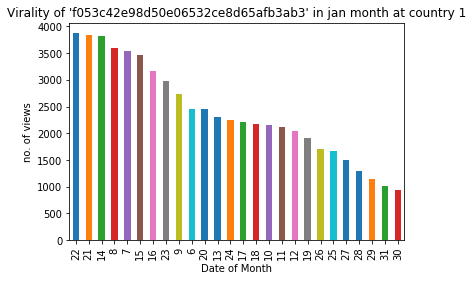

In [37]:
df2[df2['VideoId'] =='f053c42e98d50e06532ce8d65afb3ab3'][df2['date-time'].dt.month == 1]['date-time'].dt.day.value_counts().plot(kind = 'bar')
plt.title("Virality of 'f053c42e98d50e06532ce8d65afb3ab3' in jan month at country 1")
plt.xlabel('Date of Month')
plt.ylabel('no. of views')

In [ ]:
df2['Country_State'] = int((str(df2['Country']) + str(df2['State'])))
df2.head(5)